### Sprint 11 - Aprenentatge no supervisat

#### - Exercici 1
Agrupa els diferents vols utilitzant l'algorisme de K-means.


In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# open dataset 
data = pd.read_csv('DelayedFlights.csv')
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Info about each column: 

+ Year 2008
+ Month 1-12
+ DayofMonth 1-31
+ DayOfWeek 1 (Monday) - 7 (Sunday)
+ DepTime actual departure time (local, hhmm)
+ CRSDepTime scheduled departure time (local, hhmm)
+ ArrTime actual arrival time (local, hhmm)
+ CRSArrTime scheduled arrival time (local, hhmm)
+ UniqueCarrier unique carrier code
+ FlightNum flight number
+ TailNum plane tail number: aircraft registration, unique aircraft identifier
+ ActualElapsedTime in minutes
+ CRSElapsedTime in minutes
+ AirTime in minutes
+ ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
+ DepDelay departure delay, in minutes
+ Origin origin IATA airport code
+ Dest destination IATA airport code
+ Distance in miles
+ TaxiIn taxi in time, in minutes
+ TaxiOut taxi out time in minutes
+ Cancelled *was the flight cancelled
+ CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
+ Diverted 1 = yes, 0 = no
+ CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
+ WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
+ NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
+ SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
+ LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.
    
    

The kmeans algorithm is more appropriate for datasets that do not have a very high dimensionality, therefore:

+ We will select the variables that we consider most important  
+ Since in previous exercises we have already verified that we have variables with high correlation, it is possible that we can transform some variables that mean the same thing into one variable. 
+ In addition, we will later apply the PCA analysis to further reduce the number of features.
+ We will not use categorical variables for our model because we already have a lot of information, we will convert them to strings for further analysis. 

#### Data preprocessing 

In this exercise we will seek to group flights according to delay, we will not use all the columns:  

+ Year: all data is from the same year 
+ FlightNum, TailNum : no relevant information in our case 
+ Orgin and Destination: contain very extensive information and converting them to dummies generates many additional columns, we will not use them for our analysis.

In [3]:
# drop first column (unnamed column)
data.drop(data.columns[0], axis= 1, inplace= True)
# drop the other columns
cols = ['Year', 'FlightNum', 'TailNum', 'Origin', 'Dest']
data.drop(cols, axis = 1, inplace= True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   ActualElapsedTime  float64
 9   CRSElapsedTime     float64
 10  AirTime            float64
 11  ArrDelay           float64
 12  DepDelay           float64
 13  Distance           int64  
 14  TaxiIn             float64
 15  TaxiOut            float64
 16  Cancelled          int64  
 17  CancellationCode   object 
 18  Diverted           int64  
 19  CarrierDelay       float64
 20  WeatherDelay       float64
 21  NASDelay           float64
 22  SecurityDelay      float64
 23  LateAircraftDelay  float64
dtypes: float64(14), int64(8), object(2)
memory usage: 

#### Cancelled and Diverted flights 

Let's review the observations that correspond to cancelled flights to see what information they contain: 

In [5]:
data[(data['Cancelled'] == 1)].head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1542406,10,27,1,1622.0,1420,NaN,1520,WN,NaN,60.0,NaN,NaN,122.0,276,NaN,19.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1546593,10,25,6,1323.0,1255,NaN,1442,XE,NaN,107.0,NaN,NaN,28.0,529,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
1547161,10,22,3,1825.0,1815,NaN,1927,XE,NaN,72.0,NaN,NaN,10.0,351,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
1547178,10,22,3,1733.0,1715,NaN,1818,XE,NaN,63.0,NaN,NaN,18.0,253,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
1548271,10,15,3,1943.0,1745,NaN,1857,XE,NaN,72.0,NaN,NaN,118.0,295,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN


If we do a describe of these type of flights: 

In [6]:
data[(data['Cancelled'] == 1)].describe().round(2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,633.00,633.00,633.00,633.00,633.00,0.0,633.00,0.0,633.00,0.0,0.0,633.00,633.00,0.0,178.00,633.0,633.0,0.0,0.0,0.0,0.0,0.0
mean,11.67,18.02,3.99,1575.35,1468.01,NaN,1639.38,NaN,118.85,NaN,NaN,92.04,604.93,NaN,24.13,1.0,0.0,NaN,NaN,NaN,NaN,NaN
std,0.64,7.57,1.96,506.51,447.17,NaN,464.83,NaN,69.98,NaN,NaN,96.32,538.04,NaN,22.83,0.0,0.0,NaN,NaN,NaN,NaN,NaN
min,10.00,1.00,1.00,3.00,440.00,NaN,20.00,NaN,37.00,NaN,NaN,6.00,67.00,NaN,5.00,1.0,0.0,NaN,NaN,NaN,NaN,NaN
25%,12.00,11.00,2.00,1209.00,1125.00,NaN,1308.00,NaN,70.00,NaN,NaN,25.00,224.00,NaN,12.25,1.0,0.0,NaN,NaN,NaN,NaN,NaN
50%,12.00,19.00,4.00,1650.00,1530.00,NaN,1730.00,NaN,98.00,NaN,NaN,60.00,419.00,NaN,18.00,1.0,0.0,NaN,NaN,NaN,NaN,NaN
75%,12.00,24.00,6.00,1952.00,1835.00,NaN,2020.00,NaN,145.00,NaN,NaN,122.00,798.00,NaN,27.75,1.0,0.0,NaN,NaN,NaN,NaN,NaN
max,12.00,31.00,7.00,2357.00,2257.00,NaN,2358.00,NaN,405.00,NaN,NaN,712.00,2677.00,NaN,206.00,1.0,0.0,NaN,NaN,NaN,NaN,NaN


For these flights we see that we have columns that contain the flight information but other columns do not (e.g. we have in these cases the DepDelay but no information about ArrDelay). This kind of discrepancies can cause that later our model does not work well since we want to evaluate all flights, not only the cancelled ones, so we will change the value of some columns to 0 (it makes sense to think that if the flight was cancelled we do not have DepDelay).  We will fill with zero columns : 'CRSElapsedTime', 'DepDelay', 'Distance', 'TaxiOut'. 


In [4]:
# in this columns qwe are going to replace the values with 0 in the cases where flights are cancelled 
cols = ['CRSElapsedTime', 'DepDelay', 'Distance', 'TaxiOut']

condition = (data['Cancelled'] == 1)
data.loc[condition, cols] = 0

In [5]:
data[(data['Cancelled'] == 1)].head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1542406,10,27,1,1622.0,1420,NaN,1520,WN,NaN,0.0,NaN,NaN,0.0,0,NaN,0.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1546593,10,25,6,1323.0,1255,NaN,1442,XE,NaN,0.0,NaN,NaN,0.0,0,NaN,0.0,1,B,0,NaN,NaN,NaN,NaN,NaN
1547161,10,22,3,1825.0,1815,NaN,1927,XE,NaN,0.0,NaN,NaN,0.0,0,NaN,0.0,1,C,0,NaN,NaN,NaN,NaN,NaN
1547178,10,22,3,1733.0,1715,NaN,1818,XE,NaN,0.0,NaN,NaN,0.0,0,NaN,0.0,1,B,0,NaN,NaN,NaN,NaN,NaN
1548271,10,15,3,1943.0,1745,NaN,1857,XE,NaN,0.0,NaN,NaN,0.0,0,NaN,0.0,1,B,0,NaN,NaN,NaN,NaN,NaN


In [9]:
data['CancellationCode'].value_counts()

N    1936125
B        307
A        246
C         80
Name: CancellationCode, dtype: int64

Continuing with the cancelled flights, we have a column where the reason for the cancellation is indicated, we will map it to have in a single column if the flight was cancelled or not and the reason, then we can delete the column 'Cancelled'.

In [6]:
# let´s write the true reasons 
cancelation_map = {'N': 'Not Cancelled', 'C': 'National Airspace System' , 'A': 'Carrier', 'B': 'Weather'}

data['CancellationCode'] = data['CancellationCode'].map(cancelation_map).astype(str)

In addition, for cancelled flights, we will change the observations containing nan values to 0.

In [7]:
# replace with 0 nan in columns where flights are cancelled
# cols with nan values
cols_nan = ['ArrTime', 'ActualElapsedTime','CRSElapsedTime','AirTime', 'ArrDelay', 'TaxiIn', 'TaxiOut']

data.loc[data['Cancelled'] == 1, cols_nan] = data[cols_nan].fillna(0)

Now let´s check 'Diverted' flights: 

In [8]:
# check diverted flights
data[(data['Diverted'] == 1)].head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1280,1,3,4,922.0,915,NaN,1050,WN,NaN,95.0,NaN,NaN,7.0,480,NaN,12.0,0,Not Cancelled,1,NaN,NaN,NaN,NaN,NaN
1372,1,3,4,2325.0,1900,NaN,2030,WN,NaN,90.0,NaN,NaN,265.0,447,NaN,11.0,0,Not Cancelled,1,NaN,NaN,NaN,NaN,NaN
1776,1,4,5,1949.0,1905,NaN,1910,WN,NaN,65.0,NaN,NaN,44.0,335,NaN,11.0,0,Not Cancelled,1,NaN,NaN,NaN,NaN,NaN
1831,1,4,5,737.0,705,NaN,825,WN,NaN,80.0,NaN,NaN,32.0,358,NaN,13.0,0,Not Cancelled,1,NaN,NaN,NaN,NaN,NaN
2244,1,4,5,1849.0,1630,NaN,1755,WN,NaN,85.0,NaN,NaN,139.0,345,NaN,12.0,0,Not Cancelled,1,NaN,NaN,NaN,NaN,NaN


In [13]:
print('Number of diverted flights', len(data[(data['Diverted'] == 1)]))

Number of diverted flights 7754


+ From diverted flights we have DepTime and DepDelay information but we do not have information about the arrivals.
+ If we fill this nan with 0 we are creating a distorsion on our dataset for data that is not real, so we are not going to do this. 
+ Filling this nan values with the mean or median also could be a bad idea, we have already seen that this database has many outliers, and we understand that a flight that has been diverted will not follow the average values of other types of flights. 

For these reasons, we will delete observations of Diverted Flights, we do not want our analysis to revolve around these few flights. 

In [9]:
data.shape

(1936758, 24)

In [10]:
# deleting rows where flights are diverted 
data.drop(data[(data['Diverted'] == 1)].index, inplace = True) 

In [11]:
data.shape

(1929004, 24)

In [12]:
# now we can delete cancelled and diverted columns
data.drop(['Cancelled', 'Diverted'], axis = 1, inplace = True)

#### Analizing causes of Delay

We have several columns that break down the delay by type: WeatherDelay, SecurityDelay, LateAircraftDelay, ...

In [18]:
# miramos las filas donde Weather Delay no es null
data[~data['WeatherDelay'].isna()].head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,Not Cancelled,2.0,0.0,0.0,0.0,32.0
5,1,3,4,1937.0,1830,2037.0,1940,WN,240.0,250.0,230.0,57.0,67.0,1591,3.0,7.0,Not Cancelled,10.0,0.0,0.0,0.0,47.0
7,1,3,4,1644.0,1510,1845.0,1725,WN,121.0,135.0,107.0,80.0,94.0,828,6.0,8.0,Not Cancelled,8.0,0.0,0.0,0.0,72.0
9,1,3,4,1452.0,1425,1640.0,1625,WN,228.0,240.0,213.0,15.0,27.0,1489,7.0,8.0,Not Cancelled,3.0,0.0,0.0,0.0,12.0
11,1,3,4,1323.0,1255,1526.0,1510,WN,123.0,135.0,110.0,16.0,28.0,838,4.0,9.0,Not Cancelled,0.0,0.0,0.0,0.0,16.0


+ We would expect these delays to be the breakdown of DepDelay, but in reality the sum of these columns corresponds to 'ArrDelay'. This makes us suspect that the data is not quite real, it has been added after the fact to justify the delay in arrival and is probably an approximation depending on the cause of the delay.

+ If we leave them as they are, these columns are very important in the subsequent scaling and PCA analysis, since they contain very extreme values: they are usually composed either by zeros, by nan values or by high values / outliers.

+ In order not to eliminate information that can be useful in a later analysis of the particular causes of delays, we will categorize (remember that the actual delay time is already in the ArrDelay column and in this new column we will have the reason).

We will create a column that tells us the reason for the delay time: sometimes there are several values, in this case we will keep the maximum value. E.g.: if the maximum value is in the CarrierDelay column we will consider that this is the reason for the delay.

In [19]:
# concrete example
data[~data['CarrierDelay'].isna()].sample(1, random_state= 2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1887550,12,30,2,1409.0,1343,1538.0,1458,9E,149.0,135.0,119.0,40.0,26.0,622,11.0,19.0,Not Cancelled,26.0,0.0,14.0,0.0,0.0


In this example we see that CarrierDelay has a value of 26 and NasDelay has a value of 14, so we will consider that the main reason for delay in this case is CarrierDelay.

In [13]:
# we use idxmax to return the column with the highest numerical value 
data['DelayReason'] =   data[['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 
                              'LateAircraftDelay']].idxmax(axis= 1)

In [14]:
# checking rows where new created column is not Nan
data[~data['DelayReason'].isna()].head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DelayReason
3,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,Not Cancelled,2.0,0.0,0.0,0.0,32.0,LateAircraftDelay
5,1,3,4,1937.0,1830,2037.0,1940,WN,240.0,250.0,230.0,57.0,67.0,1591,3.0,7.0,Not Cancelled,10.0,0.0,0.0,0.0,47.0,LateAircraftDelay
7,1,3,4,1644.0,1510,1845.0,1725,WN,121.0,135.0,107.0,80.0,94.0,828,6.0,8.0,Not Cancelled,8.0,0.0,0.0,0.0,72.0,LateAircraftDelay
9,1,3,4,1452.0,1425,1640.0,1625,WN,228.0,240.0,213.0,15.0,27.0,1489,7.0,8.0,Not Cancelled,3.0,0.0,0.0,0.0,12.0,LateAircraftDelay
11,1,3,4,1323.0,1255,1526.0,1510,WN,123.0,135.0,110.0,16.0,28.0,838,4.0,9.0,Not Cancelled,0.0,0.0,0.0,0.0,16.0,LateAircraftDelay


In [15]:
data.DelayReason.value_counts()

LateAircraftDelay    534011
CarrierDelay         403258
NASDelay             251155
WeatherDelay          56179
SecurityDelay          2885
Name: DelayReason, dtype: int64

In [16]:
data['DelayReason'].isnull().sum()

681516

This new column contains many nan values that correspond to flights that have a delay of less than 15 minutes, so they do not specify the reason for the delay. We will change these nan values to a str. 

In [17]:
# change nan in new created columm for str 'no delayed'
data.DelayReason = data.DelayReason.fillna('Delay below 15 (unknown reason)')

In [18]:
data.DelayReason.value_counts(normalize= True)

Delay below 15 (unknown reason)    0.353299
LateAircraftDelay                  0.276833
CarrierDelay                       0.209050
NASDelay                           0.130199
WeatherDelay                       0.029123
SecurityDelay                      0.001496
Name: DelayReason, dtype: float64

In this new column we already have enough information about delays (we see that 35% of flights have a delay of less than 15 minutes). Now we can remove the columns: 

In [19]:
# we can delete these columns 
cols = ['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
data.drop(cols, axis = 1, inplace= True)

#### Treatment of nan values

In [27]:
data.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
CancellationCode     0
DelayReason          0
dtype: int64

With the processing we have applied we no longer have any nan values. 

#### Columns referring to flight time (hours)

We have 4 columns that refer to the flight time: 'CRSDepTime', 'ArrTime', 'CRSArrTime' and 'DepTime'. We will keep only 'DepTime' and so we have the reference to the departure time. 

In [20]:
data.drop(['CRSDepTime', 'ArrTime', 'CRSArrTime'], axis = 1, inplace = True)

We will keep DepTime column to know the hour of the flight, but we are going to tranform it:  the format is numerical (not hourly) and in fact we do not really care about the exact minute but in the hour, we will keep the first numbers that refer to the hours of departure of the flights. 

In [21]:
data['DepTime'] = data['DepTime'].astype(int)
# we want to have the same format in 4 digits so we can take the first 2
data['DepTime'] = data['DepTime'].map("{:04}".format)
# we will take the first 2 digits and we keep the hours
data['DepTime'] = data['DepTime'].astype(str).str[:2].astype(int)
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CancellationCode,DelayReason
0,1,3,4,20,WN,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0,Not Cancelled,Delay below 15 (unknown reason)
1,1,3,4,7,WN,128.0,145.0,113.0,2.0,19.0,810,5.0,10.0,Not Cancelled,Delay below 15 (unknown reason)
2,1,3,4,6,WN,96.0,90.0,76.0,14.0,8.0,515,3.0,17.0,Not Cancelled,Delay below 15 (unknown reason)
3,1,3,4,18,WN,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,Not Cancelled,LateAircraftDelay
4,1,3,4,19,WN,101.0,115.0,87.0,11.0,25.0,688,4.0,10.0,Not Cancelled,Delay below 15 (unknown reason)


#### ElapsedTime, TaxiIn, TaxiOut columns 

The ActualElapsedTime column refers to the actual total flight time (the sum of AirTime and TaxiIn and TaxiOut) and the CRSElapsedTime column refers to the expected time. We consider that what is really interesting is not the time itself, but the difference between both columns, so we will create a new column 'ElapsedDelay' which is the difference between 'ActualElapsedTime' and 'CRSElapsedTime'. 

In [22]:
data['ElapsedDelay'] = data['ActualElapsedTime'] - data['CRSElapsedTime']
data.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CancellationCode,DelayReason,ElapsedDelay
0,1,3,4,20,WN,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0,Not Cancelled,Delay below 15 (unknown reason),-22.0
1,1,3,4,7,WN,128.0,145.0,113.0,2.0,19.0,810,5.0,10.0,Not Cancelled,Delay below 15 (unknown reason),-17.0
2,1,3,4,6,WN,96.0,90.0,76.0,14.0,8.0,515,3.0,17.0,Not Cancelled,Delay below 15 (unknown reason),6.0


Interpretation of this new column 'ElpasedDelay': If the value is negative it means that the flight has made up time and has taken less flight time than planned, regardless of whether the flight is late or not. 

In relation to TaxiIn and TaxiOut, we see that the sum of these two columns and AirTime corresponds to the value of the column 'ActualElapsedTime'. We are actually interested in the delays, not so much in the absolute flight time, so we will eliminate these two columns too. 

In [23]:
# now we can drop the 2 columns
data.drop(['ActualElapsedTime', 'CRSElapsedTime', 'TaxiIn', 'TaxiOut'], axis = 1, inplace = True)

In [24]:
data.shape

(1929004, 12)

Change the order of columns: 

In [25]:
cols = [ 'ArrDelay', 'DepDelay', 'ElapsedDelay', 'AirTime', 'Distance',
        'DepTime', 'Month', 'DayofMonth', 'DayOfWeek',
       'CancellationCode', 'DelayReason', 'UniqueCarrier']
data = data[cols]

We will keep the columns that refer to the time, month and day of the flight, we will not use them for our model but they can be useful in a later analysis. 

In [26]:
data.head()

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek,CancellationCode,DelayReason,UniqueCarrier
0,-14.0,8.0,-22.0,116.0,810,20,1,3,4,Not Cancelled,Delay below 15 (unknown reason),WN
1,2.0,19.0,-17.0,113.0,810,7,1,3,4,Not Cancelled,Delay below 15 (unknown reason),WN
2,14.0,8.0,6.0,76.0,515,6,1,3,4,Not Cancelled,Delay below 15 (unknown reason),WN
3,34.0,34.0,0.0,77.0,515,18,1,3,4,Not Cancelled,LateAircraftDelay,WN
4,11.0,25.0,-14.0,87.0,688,19,1,3,4,Not Cancelled,Delay below 15 (unknown reason),WN


In [46]:
#data.to_csv('cleaned_data.csv', index= False)

#### SCALING AND PCA

+ For the PCA analysis we will select the first 5 columns: those referring to delays and to the distance and airtime of the flight. 

+ Prior to the PCA analysis we will scale features with StandardScaler since in this way all the variables will have the same mean and the same standard deviation. 


In [27]:
# use the firts 5 columns 
X = data.iloc[: , : 5]

In [28]:
X.head()

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance
0,-14.0,8.0,-22.0,116.0,810
1,2.0,19.0,-17.0,113.0,810
2,14.0,8.0,6.0,76.0,515
3,34.0,34.0,0.0,77.0,515
4,11.0,25.0,-14.0,87.0,688


In [29]:
from sklearn.preprocessing import StandardScaler

trans = StandardScaler()
X = trans.fit_transform(X)

In [30]:
# use the original column names 
dataset = pd.DataFrame(X, columns = data.iloc[: , : 5].columns)

In [31]:
dataset.head()

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance
0,-0.989530,-0.658573,-1.224738,0.112998,0.078930
1,-0.707743,-0.452051,-0.934632,0.069304,0.078930
2,-0.496403,-0.658573,0.399854,-0.469588,-0.435045
3,-0.144170,-0.170429,0.051727,-0.455024,-0.435045
4,-0.549238,-0.339402,-0.760569,-0.309377,-0.133629


In [32]:
dataset.describe().round(2)

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance
count,1929004.00,1929004.00,1929004.00,1929004.00,1929004.00
mean,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.66,-0.81,-10.45,-1.58,-1.33
25%,-0.58,-0.58,-0.53,-0.73,-0.74
50%,-0.32,-0.36,-0.12,-0.27,-0.28
75%,0.24,0.19,0.34,0.42,0.40
max,42.60,45.51,44.09,14.31,7.31


Now all features have a mean of 0 and std of 1. Looking at max values we see that features that refere to delays are more spread than the ones refering to AirTime/Distance. Now we apply PCA: 

In [33]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X)

PCA()

We can print an array with the cumulative explained variance of each PCA component and plot it in a graph, we are seeking for an explained variability of 95%: 

In [34]:
np.cumsum(pca.explained_variance_ratio_)

array([0.40950804, 0.80282813, 0.99674246, 1.        , 1.        ])

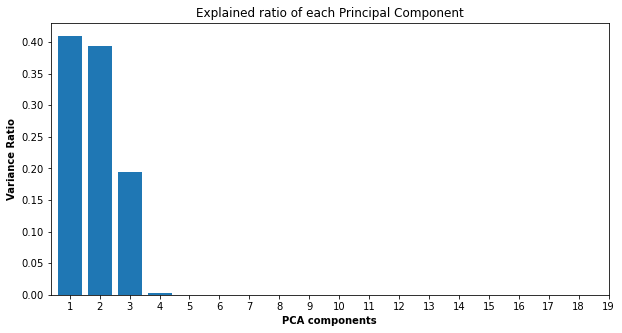

In [56]:
# Variance Ratio bar plot for each PCA components.
plt.figure(figsize = (10, 5))

ax = plt.bar(range(1, len(pca.explained_variance_ratio_) +1 ), pca.explained_variance_ratio_)
plt.xlabel('PCA components', fontweight = 'bold')
plt.ylabel('Variance Ratio', fontweight = 'bold')
plt.xticks(np.arange(1,20))
plt.title('Explained ratio of each Principal Component')
plt.show()

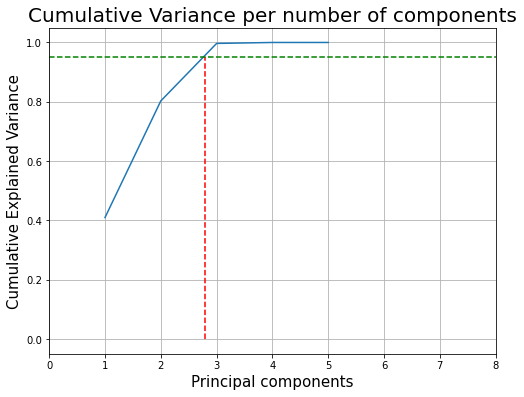

In [57]:
fig = plt.figure(figsize = (8,6)) 
pca_values = np.arange(pca.n_components_) + 1
plt.plot(pca_values, np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=2.80, ymax=0.95, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=10, xmin=0 , colors="g", linestyles="--")
plt.ylabel('Cumulative Explained Variance', fontsize = 15)
plt.xlabel("Principal components",fontsize=15)
plt.xlim([0,8])
plt.xticks(np.arange(0,9))
plt.grid(True)
plt.title('Cumulative Variance per number of components', fontsize = 20)
plt.show()

In [58]:
# with 3 components we can achieve more than 95% of varianmce explained
pca95 = PCA(0.95)
pca95.fit(X).n_components_

3

In the three methods we have used it is clear that we need 3 components to obtain 95% of the variance, so we will use the PCA with 3 components. We can analyze how 3 components relate to our features: 

In [59]:
# we choose 3 components 
org_col = list(data.iloc[: , : 5].columns)
attributes_pca = pd.DataFrame({'Attribute' : org_col, 'PC_1': pca.components_[0], 'PC_2': pca.components_[1], 
                              'PC_3':pca.components_[2]})
attributes_pca

,Attribute,PC_1,PC_2,PC_3
0,ArrDelay,0.630457,0.306553,-0.037160
1,DepDelay,0.588545,0.299982,-0.342580
2,ElapsedDelay,0.258198,0.082873,0.936277
3,AirTime,-0.297027,0.640534,0.067344
4,Distance,-0.318195,0.631573,-0.010401


In this table, for each feature, we have the explained variance that each component contributes: 

+ PC 1 : provides more information on ArrDelay, DepDelay
+ Pc 2 : explains more AirTime, Distance 
+ PC3 : provides info on  ElpasedDelay 

In relation to this, we can plot how the component relates to each feature, we will visualize first PAC1 and PCA2 and later PCA2 and PCA3: 

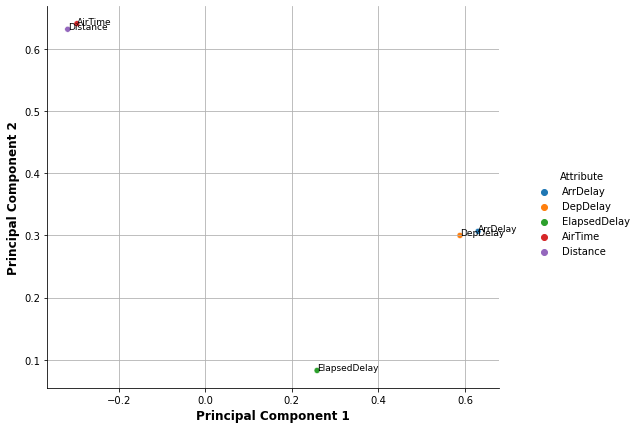

In [60]:
# Plotting the above dataframe for better visualization with PC1 and PC2

g=sns.pairplot(data = attributes_pca, x_vars = ['PC_1'], y_vars = ['PC_2'], hue = 'Attribute', 
             height = 6).fig.set_size_inches(9,6)
plt.xlabel("Principal Component 1",fontweight = 'bold', fontsize = 12)
plt.ylabel("Principal Component 2",fontweight = 'bold', fontsize = 12)

plt.grid(True)
for i, txt in enumerate(attributes_pca.Attribute): 
    plt.annotate(txt, (attributes_pca.PC_1[i], attributes_pca.PC_2[i]), fontsize = 9)
plt.show()

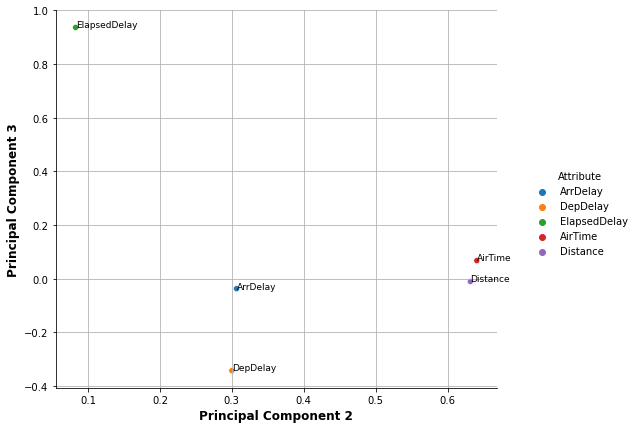

In [61]:
# Same for PCA 2 and PCA 3

g=sns.pairplot(data = attributes_pca, x_vars = ['PC_2'], y_vars = ['PC_3'], hue = 'Attribute', 
             height = 6).fig.set_size_inches(9,6)
plt.xlabel("Principal Component 2",fontweight = 'bold', fontsize = 12)
plt.ylabel("Principal Component 3",fontweight = 'bold', fontsize = 12)

plt.grid(True)
for i, txt in enumerate(attributes_pca.Attribute): 
    plt.annotate(txt, (attributes_pca.PC_2[i], attributes_pca.PC_3[i]), fontsize = 9)
plt.show()

All features seem well represented, so we will apply PCA to our data: 

In [35]:
# set pca features to 3

pca3 = PCA(n_components= 3)
pca3.fit(X)

pca_df = pd.DataFrame(pca3.transform(X), columns = [['PCA1', 'PCA2', 'PCA3']])

pca_df.head()

,PCA1,PCA2,PCA3
0,-1.386359,-0.480172,-0.877520
1,-0.999274,-0.335782,-0.690065
2,-0.319410,-0.892146,0.591335
3,0.095741,-0.657255,0.086056
4,-0.607988,-0.615779,-0.594866


We can see how the data is distributed in these three dimensions:  

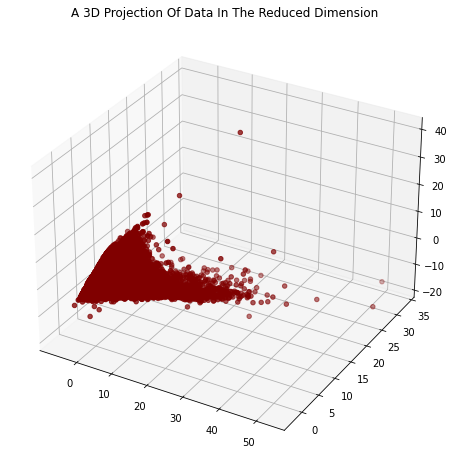

In [63]:
#A 3D Projection Of Data In The Reduced Dimension
x =pca_df["PCA1"]
y =pca_df["PCA2"]
z =pca_df["PCA3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

The data appears to be fairly concentrated with the exception of a few loose points. 

### Model Building


#### K- means Clustering

While we plot the **Elbow method** to find optimal k we will use **Kneed** library to have the value in numbers (we have to do a for loop in both cases) 

In [65]:
from sklearn.cluster import KMeans
import kneed
from kneed import KneeLocator

# Quick examination of elbow method to find numbers of clusters to make.
inertia = []
sse = {}
for n in range (1,11): 
    algorithm = KMeans(n_clusters= n, init = 'k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
    algorithm.fit(pca_df)
    inertia.append(algorithm.inertia_)
    sse[n] = algorithm.inertia_

In [66]:
# we also use kneed locator to have the value in numbers     
kn = KneeLocator(x=list(sse.keys()), 
             y=list(sse.values()), 
             curve='convex', 
             direction='decreasing')
print('Optimal k: ', round(kn.knee, 2))


Optimal k:  3


With knee method we see optimal number of clusters would be 3. Let´s look at the elbow method: 

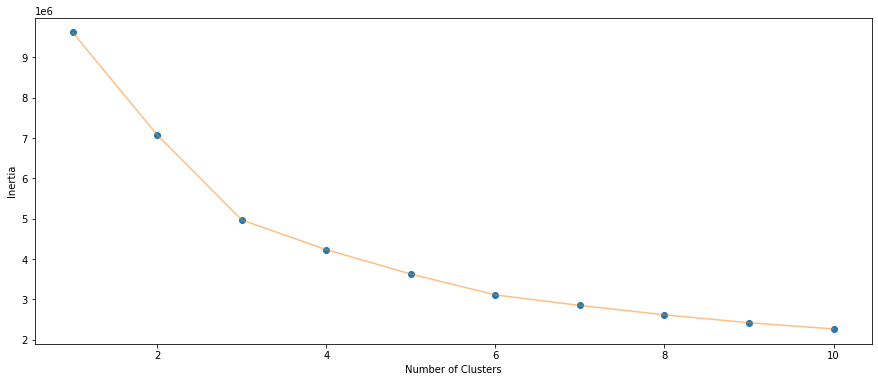

In [67]:
# elbow method 
plt.figure(1, figsize= (15,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In the graph above, we observe that when k is 3 there is an inflection point, the value of SSE flattens out. We will choose 3 clusters for our model. 

In [37]:
from sklearn.cluster import KMeans
# try with 3
kmeans3 = KMeans(n_clusters= 3, max_iter= 150, random_state= 42)
kmeans3.fit(pca_df)

KMeans(max_iter=150, n_clusters=3, random_state=42)

In [69]:
kmeans3.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 150,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [38]:
# generate a new column with the predicted clusters in a new dataset
clusters3 = data.copy()
clusters3['Cluster_pred'] = kmeans3.fit_predict(pca_df)

In [39]:
clusters3.head()

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek,CancellationCode,DelayReason,UniqueCarrier,Cluster_pred
0,-14.0,8.0,-22.0,116.0,810,20,1,3,4,Not Cancelled,Delay below 15 (unknown reason),WN,0
1,2.0,19.0,-17.0,113.0,810,7,1,3,4,Not Cancelled,Delay below 15 (unknown reason),WN,0
2,14.0,8.0,6.0,76.0,515,6,1,3,4,Not Cancelled,Delay below 15 (unknown reason),WN,0
3,34.0,34.0,0.0,77.0,515,18,1,3,4,Not Cancelled,LateAircraftDelay,WN,0
4,11.0,25.0,-14.0,87.0,688,19,1,3,4,Not Cancelled,Delay below 15 (unknown reason),WN,0


In [72]:
clusters3.Cluster_pred.value_counts()

0    1381518
1     329326
2     218160
Name: Cluster_pred, dtype: int64

We see that the size of the clusters is not equal. We can also add our predictions to our pca_df to check how it looks like: 

In [40]:
# generate predicitons column in our PCA df 
pca_df['predictions'] = kmeans3.fit_predict(pca_df)
pca_df.head()

,PCA1,PCA2,PCA3,predictions
0,-1.386359,-0.480172,-0.877520,0
1,-0.999274,-0.335782,-0.690065,0
2,-0.319410,-0.892146,0.591335,0
3,0.095741,-0.657255,0.086056,0
4,-0.607988,-0.615779,-0.594866,0


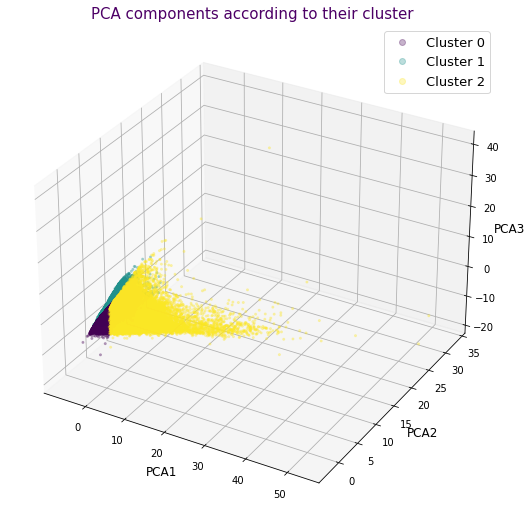

In [41]:
# plot firts 3 components
fig = plt.figure(figsize= (9,9))

ax = fig.add_subplot(projection = '3d')
plot = ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c = pca_df['predictions'], alpha = 0.3, s=4)
plt.legend(handles = plot.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.xlabel("PCA1", fontsize = 12)
plt.ylabel("PCA2", fontsize = 12)
ax.set_zlabel("PCA3", fontsize = 12)
plt.title('PCA components according to their cluster', fontsize= 15, color= '#4d0066')
plt.show()

We can see the distribution of the clusters between the 3 components of PCA. We see that cluster 2, despite being the smallest in number of observations, is the one that appears to be the largest. This may be due to the fact that its observations are more dispersed. When we do the statistical analysis of each cluster we will be able to confirm this. 

Sometimes it is easier to visualize in 2 dimensions so we can plot the PCA components in two dimensions: PCA1 and PCA2 and on the other side PCA1 and PCA3.

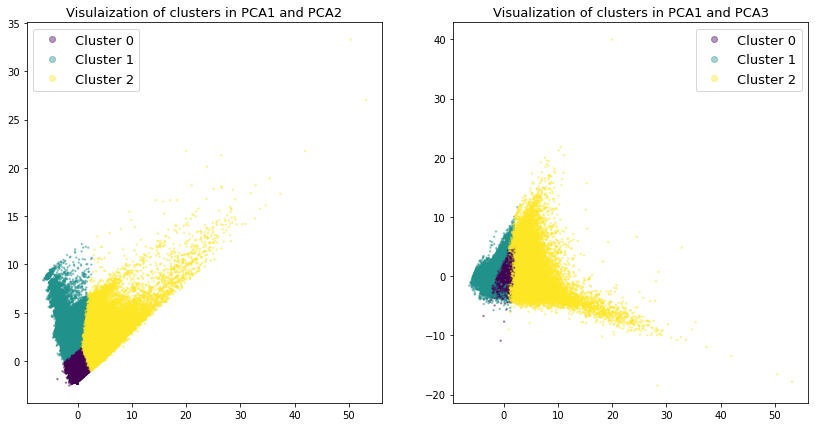

In [44]:
# Scatter plot on Principal components to visualize the spread of the data
fig = plt.figure(figsize=(14,7))

plt.subplot(121)
plot2 = plt.scatter(x = pca_df['PCA1'], y = pca_df['PCA2'], c= pca_df['predictions'] , alpha = 0.4 , s= 2)
plt.legend(handles = plot2.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.title('Visulaization of clusters in PCA1 and PCA2', fontsize = 13)

plt.subplot(122)
plot3 = plt.scatter(x = pca_df['PCA1'], y = pca_df['PCA3'], c= pca_df['predictions'] , alpha = 0.4, s = 2 )
plt.legend(handles = plot3.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.title('Visualization of clusters in PCA1 and PCA3', fontsize = 13)

plt.show()

Looking at this, we see that the clusters appear well defined, especially in the PCA1 vs PCA2 plot. In fact, cluster 0 has many more observations than the other two but seems smaller because the data is much more concentrated. 

#### Summary statistics for each cluster

Let's review the summary statistics for each cluster to see the differences: 

In [80]:
# describe of each cluster: 
clusters3[clusters3['Cluster_pred'] == 0].describe().round(2)

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek,Cluster_pred
count,1381518.00,1381518.00,1381518.00,1381518.00,1381518.00,1381518.00,1381518.00,1381518.00,1381518.00,1381518.0
mean,26.58,28.77,-2.19,81.38,542.28,14.83,6.10,15.74,3.97,0.0
std,24.86,22.72,12.56,35.00,285.07,4.29,3.48,8.76,1.99,0.0
min,-109.00,0.00,-181.00,0.00,0.00,0.00,1.00,1.00,1.00,0.0
25%,8.00,11.00,-10.00,53.00,304.00,12.00,3.00,8.00,2.00,0.0
50%,20.00,21.00,-4.00,77.00,503.00,15.00,6.00,16.00,4.00,0.0
75%,41.00,40.00,3.00,108.00,761.00,18.00,9.00,23.00,6.00,0.0
max,100.00,213.00,90.00,200.00,1593.00,24.00,12.00,31.00,7.00,0.0


In [81]:
clusters3[clusters3['Cluster_pred'] == 1].describe().round(2)

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek,Cluster_pred
count,329326.00,329326.00,329326.00,329326.00,329326.00,329326.00,329326.00,329326.00,329326.00,329326.0
mean,28.09,31.61,-3.51,226.60,1765.73,14.19,6.13,15.73,4.01,1.0
std,33.74,29.81,17.87,59.55,499.49,4.80,3.42,8.77,2.00,0.0
min,-70.00,6.00,-101.00,125.00,867.00,0.00,1.00,1.00,1.00,1.0
25%,5.00,11.00,-15.00,180.00,1391.00,11.00,3.00,8.00,2.00,1.0
50%,20.00,20.00,-5.00,213.00,1642.00,14.00,6.00,16.00,4.00,1.0
75%,44.00,42.00,5.00,263.00,2116.00,18.00,9.00,23.00,6.00,1.0
max,327.00,333.00,212.00,664.00,4962.00,24.00,12.00,31.00,7.00,1.0


In [82]:
clusters3[clusters3['Cluster_pred'] == 2].describe().round(2)

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek,Cluster_pred
count,218160.00,218160.00,218160.00,218160.00,218160.00,218160.00,218160.00,218160.00,218160.00,218160.0
mean,162.27,150.97,11.30,99.67,662.09,16.37,6.13,15.88,4.02,2.0
std,81.34,85.68,31.23,52.74,430.28,5.07,3.56,8.91,2.03,0.0
min,87.00,6.00,-151.00,0.00,11.00,0.00,1.00,1.00,1.00,2.0
25%,113.00,105.00,-7.00,60.00,334.00,14.00,3.00,8.00,2.00,2.0
50%,139.00,132.00,3.00,90.00,589.00,17.00,6.00,16.00,4.00,2.0
75%,184.00,177.00,20.00,129.00,892.00,20.00,9.00,23.00,6.00,2.0
max,2461.00,2467.00,759.00,1091.00,4962.00,24.00,12.00,31.00,7.00,2.0


In [83]:
clusters3[clusters3['Cluster_pred'] == 0]['CancellationCode'].value_counts()

Not Cancelled               1380885
Weather                         307
Carrier                         246
National Airspace System         80
Name: CancellationCode, dtype: int64

In [84]:
clusters3[clusters3['Cluster_pred'] == 1]['CancellationCode'].value_counts()

Not Cancelled    329326
Name: CancellationCode, dtype: int64

In [85]:
clusters3[clusters3['Cluster_pred'] == 2]['CancellationCode'].value_counts()

Not Cancelled    218160
Name: CancellationCode, dtype: int64

In [86]:
clusters3[clusters3['Cluster_pred'] == 0]['DelayReason'].value_counts(normalize= True)

Delay below 15 (unknown reason)    0.393051
LateAircraftDelay                  0.267226
CarrierDelay                       0.202047
NASDelay                           0.110702
WeatherDelay                       0.025415
SecurityDelay                      0.001558
Name: DelayReason, dtype: float64

In [87]:
clusters3[clusters3['Cluster_pred'] == 1]['DelayReason'].value_counts(normalize= True)

Delay below 15 (unknown reason)    0.420583
LateAircraftDelay                  0.213645
CarrierDelay                       0.200543
NASDelay                           0.146466
WeatherDelay                       0.016859
SecurityDelay                      0.001904
Name: DelayReason, dtype: float64

In [88]:
clusters3[clusters3['Cluster_pred'] == 2]['DelayReason'].value_counts(normalize= True)

LateAircraftDelay    0.433049
CarrierDelay         0.266236
NASDelay             0.229112
WeatherDelay         0.071122
SecurityDelay        0.000481
Name: DelayReason, dtype: float64

In [45]:
clusters3['Cluster_pred'].value_counts(normalize = True)

0    0.716182
1    0.170723
2    0.113095
Name: Cluster_pred, dtype: float64

Looking at this we are already able to define some characteristics of each cluster: 

#### Cluster 0: 

+ It is the group with by far the most observations (72 % of flights). 
+ The average delay time is low. Half of the flights are less than 20 minutes late. 
+ ElapsedDelay is negative, meaning that the flight time is less than expected. 
+ These are short/medium haul flights (average 542 miles per flight and 81 minutes flight time). 
+ All cancelled flights are included in this group. 


#### Cluster 1: 

+ This group is smaller than the previous one  (17% of flghts) 
+ Delay time is also low. 
+ ElpasedDelay is also negative
+ The main difference with the previous cluster is that this one includes medium/long distance flights. The average flight time is 227 minutes and the distance 1766 miles. 
+ We have no cancelled flights in this group.  


#### Cluster 2: 

+ This is the smallest group (11% of flights).
+ These are flights with a very high delay time (the average delay of these flights is 162 minutes!!!) The flight with the minimum delay has a delay of 87 minutes. 
+ On average these are short/medium distance flights, but a little longer than in cluster 0. 
+ The leading reason for delays on these flights is 'LateAircraftDelay' (43% of times), followed by 'Carrierdelay' (26% of times).
+ The departure time is higher than in the other clusters, which may mean that these flights tend to accumulate more as the day progresses. 

#### Graphical analysis

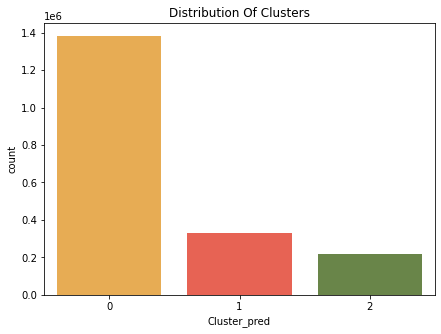

In [89]:
#Plotting countplot of clusters
plt.figure(figsize = (7,5))
pal = ['#ffb13c', '#ff503c', '#698f3f']
pl = sns.countplot(x=clusters3['Cluster_pred'], palette= pal)
pl.set_title("Distribution Of Clusters")
plt.show()

As we have already seen, the division of clusters has not been done in an equitable manner. 

#### Analizing numerical features

First we will do some boxplots of the most important numerical variables: 

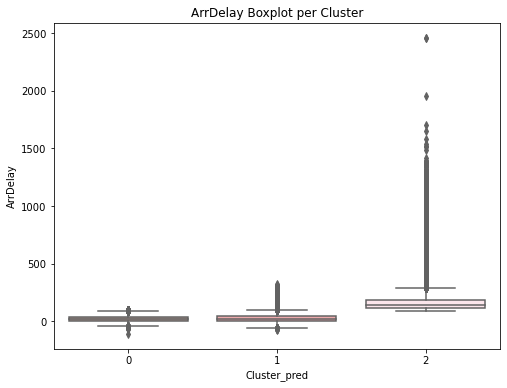

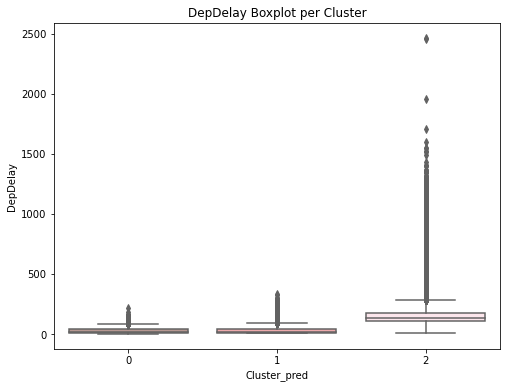

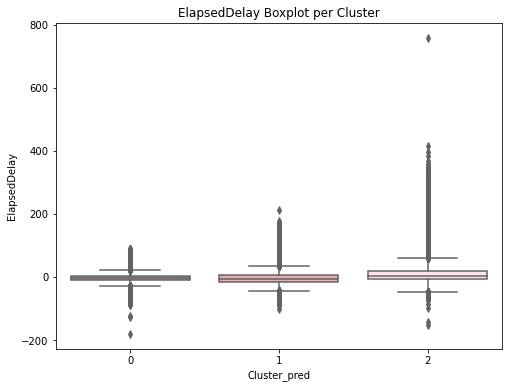

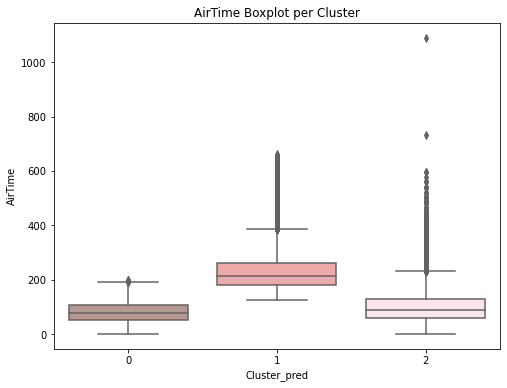

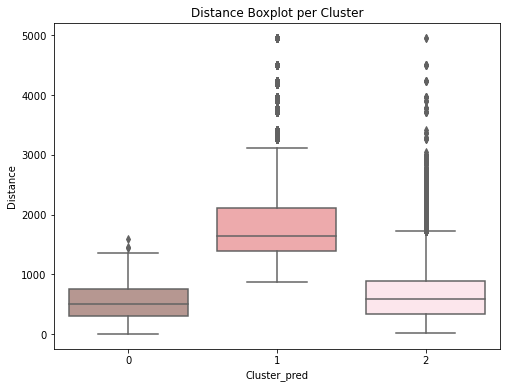

In [90]:
# list of features we are going to evaluate 
list = ['ArrDelay', 'DepDelay', 'ElapsedDelay', 'AirTime', 'Distance']

for i in list: 
    plt.figure(figsize = (8,6))
    sns.boxplot(x =clusters3['Cluster_pred'], y = clusters3[i], palette = ['#bc938b', '#f89fa1', '#ffe3eb'] )
    plt.title("{} Boxplot per Cluster".format(i),fontsize=12)
    plt.show()

The boxplots more or less confirm what we have already seen: 

+ ArrDelay : We see that in cluster 0 and 1 we have few outliers and the data is concentrated around the mean. For these clusters (0 and 1) we have outliers of positive and negative values. In cluster 2 we observe that we have many outliers, but all of them are for positive values. 


+ DepDelay: Similar to ArrDelay but without negative outliers in clusters 0 and 1.  


+ ElapsedDelay : We have both positive and negative outliers in all clusters, but these are much larger in the case of cluster 2. 


+ AirTime/Distance : we can clearly see the differences between cluster 0 and cluster 1 (the former has shorter flights). It can also be seen that cluster 2 has flights of all types, short and long distance. 

We will now look at how these variables are distributed: 


<Figure size 576x360 with 0 Axes>

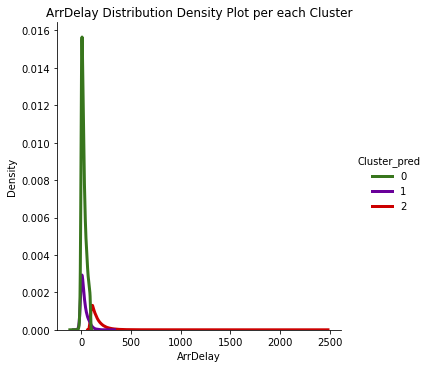

<Figure size 576x360 with 0 Axes>

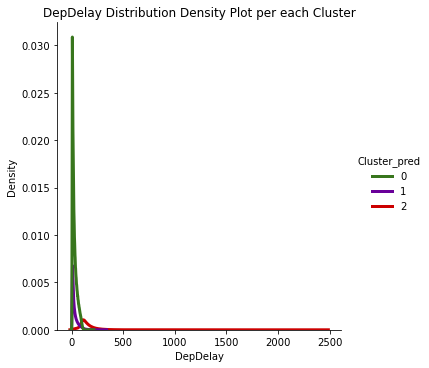

<Figure size 576x360 with 0 Axes>

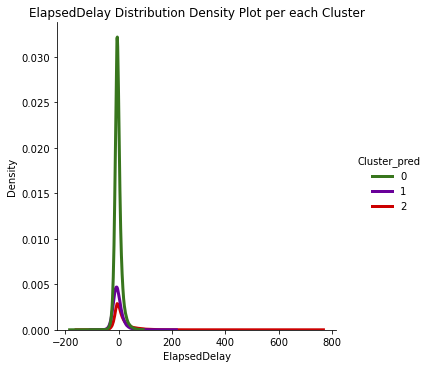

<Figure size 576x360 with 0 Axes>

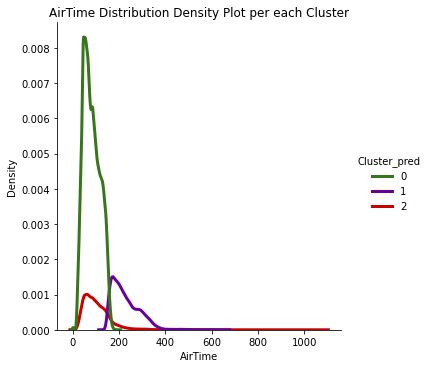

<Figure size 576x360 with 0 Axes>

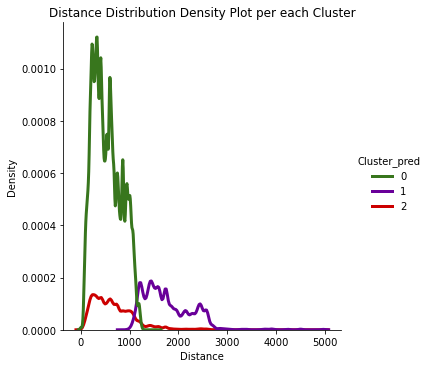

In [91]:
for i in list: 
    plt.figure(figsize = (8,5))
    sns.displot(x =clusters3[i], hue = clusters3['Cluster_pred'], kind = 'kde', 
                palette = ['#38761d', '#690099', '#cc0000'], linewidth = 3)
    plt.title("{} Distribution Density Plot per each Cluster".format(i),fontsize=12)
    plt.show()

+ ArrDelay and DepDelay : Clusters 0 and 1 are concentrated at lower values. Cluster 2 has a marked right skewed distribution and ranges over very high values.  


+ ElapsedDelay : the three groups have a similar distribution, but group 2 has more extreme values in the positive values. 


+ AirTime/Distance : we can clearly see the differences between each cluster. Cluster 0 are short flights, cluster 1 long flights and cluster 2 a mix of both (although it has more short flights as well). 


We can also make some scatterplots to see if we can locate the clusters in relation to two variables: 

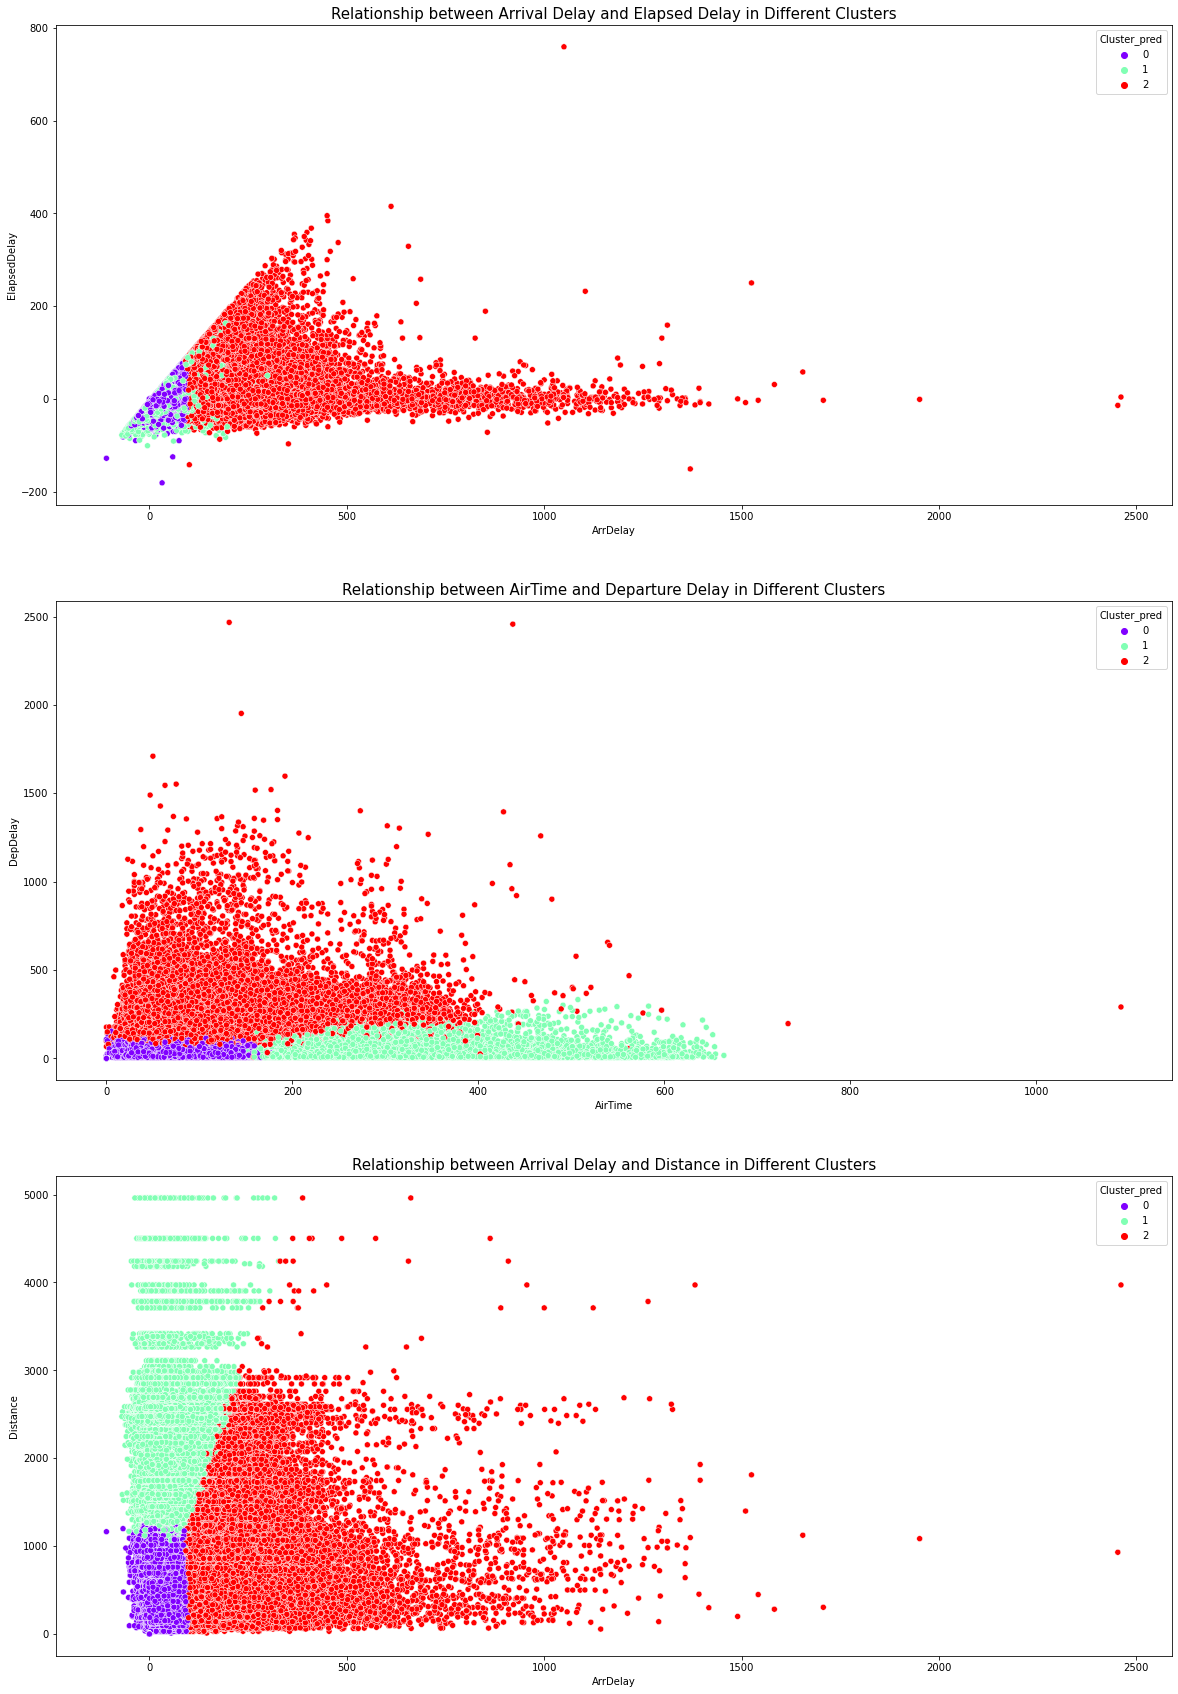

In [92]:
# some scatterplots 
plt.figure(figsize = (20,30))
plt.subplot(3,1,1)
sns.scatterplot(x = 'ArrDelay', y = 'ElapsedDelay',hue='Cluster_pred',data = clusters3,legend='full',palette="rainbow")
plt.title('Relationship between Arrival Delay and Elapsed Delay in Different Clusters', fontsize = 15)
plt.subplot(3,1,2)
sns.scatterplot(x = 'AirTime', y = 'DepDelay',hue='Cluster_pred', data = clusters3,legend='full',palette="rainbow")
plt.title('Relationship between AirTime and Departure Delay in Different Clusters', fontsize = 15)
plt.subplot(3,1,3)
sns.scatterplot(x = 'ArrDelay', y = 'Distance',hue='Cluster_pred', data=clusters3,legend='full',palette="rainbow")
plt.title('Relationship between Arrival Delay and Distance in Different Clusters', fontsize = 15)
plt.show()

+ We notice that in the three scatterplots, cluster 2 seems to be the largest and cluster 0 the smallest, this may be because the data from cluster 0 is much more concentrated and in cluster 2 is more scattered.

+ The groups seem very well defined, especially in the scatterplot between Distance and ArrDelay. 

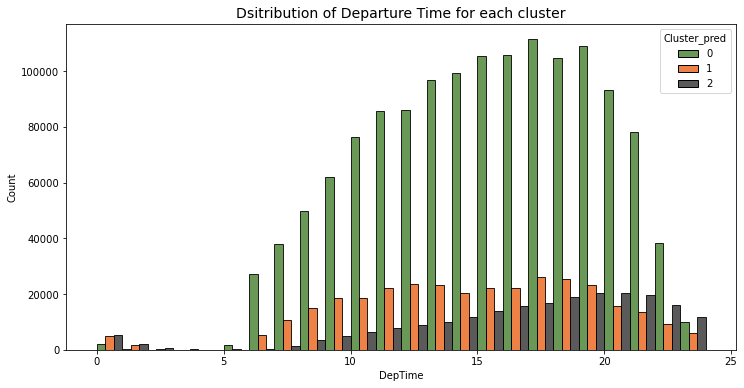

In [126]:
plt.figure(figsize=(12,6))
range_bin_width = range(0, 25, 1)
sns.histplot(x =clusters3['DepTime'], hue = clusters3['Cluster_pred'], bins= range_bin_width, multiple = 'dodge',  
            palette = ['#38761d', '#e85708', '#232323'])
plt.title('Dsitribution of Departure Time for each cluster', fontsize = 14); 

Looking at the distribution of the departure times of the flights of each cluster, it seems evident that the flights that have more delays tend to increase as the day progresses (early in the day there are hardly any flights of this type).In fact, at the end of the day we see that the proportion of flights with high delay (cluster 2) is higher than for the other clusters.  

#### Plot categorical features in each cluster

Let's now look at the categorical variables and their relationship with each cluster. First we will look at Delay Reasons: 

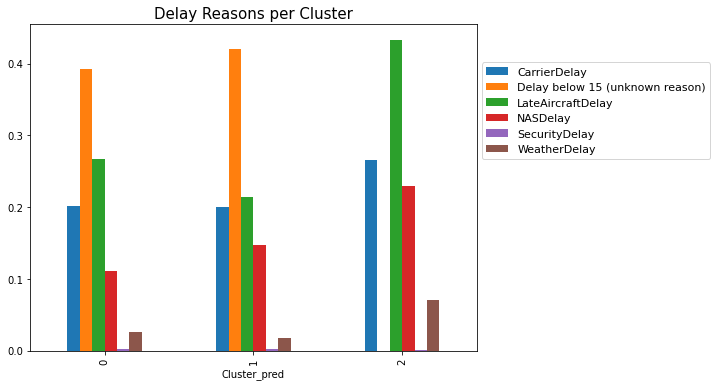

In [94]:
reasons_percent = clusters3.groupby('Cluster_pred')['DelayReason'].value_counts(normalize = True)
reasons_percent.unstack(fill_value=0).plot(figsize = (8,6), kind = 'bar')
plt.legend(prop={'size': 11}, bbox_to_anchor=(1, 0.9))
plt.title('Delay Reasons per Cluster', fontsize = 15); 

+ Cluster 0 and cluster 1 : Most common reason is 'Delay below 15' minutes. 
+ Cluster 2 : most common reason is LateAircraftDelay, folowed by CarrierDelay. 

We only have cancelled flights in cluster 0, we can review the cancellation reasons for this group: 

In [95]:
clusters3[clusters3['Cluster_pred'] == 0]['CancellationCode'].value_counts()

Not Cancelled               1380885
Weather                         307
Carrier                         246
National Airspace System         80
Name: CancellationCode, dtype: int64

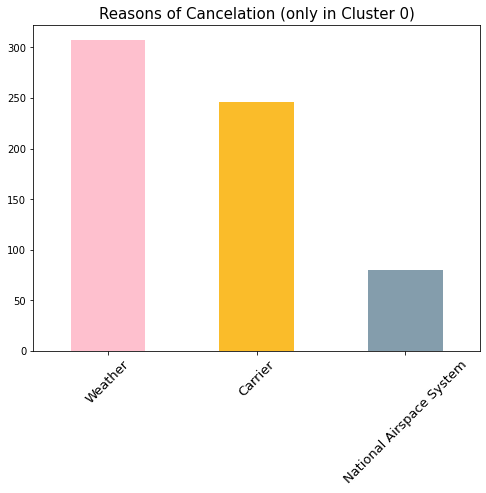

In [96]:
# reasons of cancellation (only for cluster 0)
canc = clusters3[clusters3['CancellationCode'] != 'Not Cancelled']['CancellationCode'].value_counts()
canc.plot(kind= 'bar', figsize = (8,6), color = ['#fec0ce', '#fabc2a','#849dac'])
plt.title('Reasons of Cancelation (only in Cluster 0)', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 13); 

We see that the main reason for cancellation is Weather, followed by Carrier and National Airspace System. 


We can also review the relationship that each Carrier has with the clusters, in particular, it would be interesting to see the **percentage of flights of each cluster for each Carrier.**

In [97]:
# do the percentage of each cluster for each carrier 
carriers_percent = clusters3.groupby('UniqueCarrier')['Cluster_pred'].value_counts(normalize = True)
carriers_percent = carriers_percent.unstack()
carriers_percent

Cluster_pred,0,1,2
UniqueCarrier,,,
9E,0.859589,0.002363,0.138048
AA,0.537003,0.341429,0.121567
AQ,0.677419,0.299731,0.022849
AS,0.700879,0.219497,0.079624
B6,0.541130,0.289233,0.169637
CO,0.428791,0.463270,0.107939
DL,0.621904,0.277075,0.101021
EV,0.855351,0.000966,0.143683
F9,0.808829,0.144406,0.046765


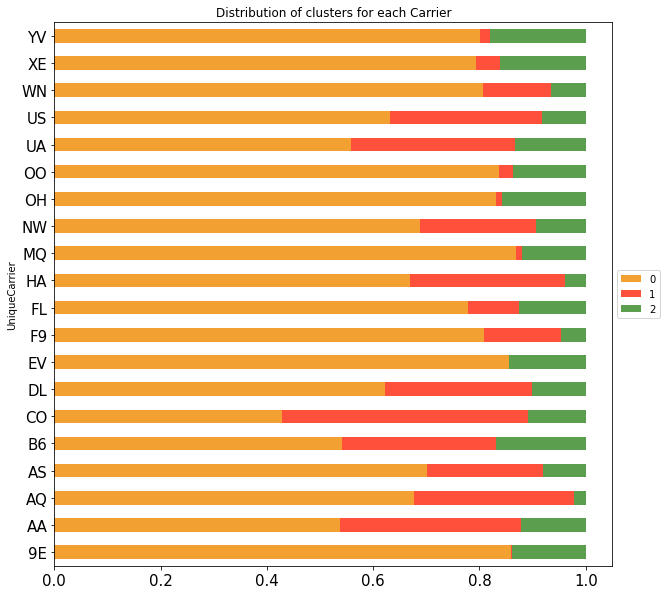

In [98]:
carriers_percent.plot( kind = 'barh', stacked = True, mark_right = True, 
                     title = 'Distribution of clusters for each Carrier', fontsize = 15, 
                     figsize = (10,10), color = [ '#f1a031', '#ff503c', '#5b9e4d',])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)); 

As we know the characteristics of each cluster, we can draw conclusions about each Carrier only by knowing the portion of each cluster it has: 

+ The higher the percentage of green line, the longer the average delay time of that Carrier.
+ If the green line is small, the shorter the average delay time for that company. 
+ If the orange line is larger, it means that the company operates more short-haul flights. 
+ If the red line is relatively long, it means that the company will have longer flights. 

Specific examples:

+ The average delay time for AQ is small. 
+ 9E operates mostly short-haul flights.  
+ CO is a Carrier that has longer than average flight durations.  
+ YV is a Carrier that has a high delay time compared to the average. 

If we want to check if these conclusions are true: 

In [99]:
arr_delay = clusters3['ArrDelay'].mean()
AQ_arrdelay = clusters3[clusters3['UniqueCarrier'] == 'AQ']['ArrDelay'].mean()

print('Average Arrival Delay for AQ Carrier: ', round(AQ_arrdelay, 2))
print('Average Arrival Delay for all flights: ', round(arr_delay, 2))

Average Arrival Delay for AQ Carrier:  21.26
Average Arrival Delay for all flights:  42.19


In [100]:
distance_9E = clusters3[clusters3['UniqueCarrier'] == '9E']['Distance'].mean()
distance = clusters3['Distance'].mean()

print('Average distance for 9E Carrier: ', round(distance_9E, 2))
print('Average distance for all the flights:  ', round(distance, 2))

Average distance for 9E Carrier:  463.37
Average distance for all the flights:   764.7


In [101]:
distance_CO = clusters3[clusters3['UniqueCarrier'] == 'CO']['Distance'].mean()


print('Average distance for CO Carrier: ', round(distance_CO, 2))
print('Average distance for all the flights:  ', round(distance, 2))

Average distance for CO Carrier:  1238.54
Average distance for all the flights:   764.7


In [102]:
YV_arrdelay = clusters3[clusters3['UniqueCarrier'] == 'YV']['ArrDelay'].mean()

print('Average Arrival Delay for YV Carrier: ', round(YV_arrdelay, 2))
print('Average Arrival Delay for all flights: ', round(arr_delay, 2))

Average Arrival Delay for YV Carrier:  55.24
Average Arrival Delay for all flights:  42.19


The advantage of clusters in this case is that by knowing the characteristics of each clusters, we can look at the plot and know the strengths of each Carrier and what measures can be taken to make improvements. 

Lastly, we can evaluate the proprortion of flights of each cluster for each month of the year (we could do that also for DayOfWeek and DayOfMonth but the results are not so significative). 

In [103]:
clrs = ['#fdcb29', '#c06378', '#94b0b7']

months_percent = clusters3.groupby('Month')['Cluster_pred'].value_counts(normalize = True)
#day_percent = clusters3.groupby('DayOfWeek')['Cluster_pred'].value_counts(normalize = True)
#day_month_percent = clusters3.groupby('DayofMonth')['Cluster_pred'].value_counts(normalize = True)

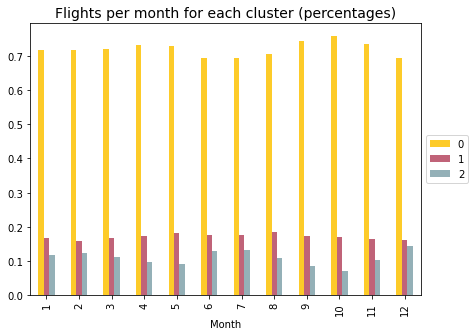

In [104]:
months_percent.unstack(fill_value=0).plot( figsize = (7,5),  kind = 'bar', color = clrs)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Flights per month for each cluster (percentages)', fontsize = 14); 

Looking at the graph and how the clusters are distributed in different months, we can conclude that July and December are the months with the highest average delay (cluster 2 is larger in these months than in the rest).

**This exercise is continued in another Notebook in the same GitHub repository.**